In [1]:
import reskit as rk
import pandas as pd
from os import listdir, chdir, getcwd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Solar PV
# Placment locations do not have to be put in as a pandas dataframe (a list of coordinates would also be okay), but 
#  it is also the most flexible. Therefore, this manner is suggested
# if elevation is not specified defaults to 300 m, tilt and azimuth can be computed
placements = pd.read_csv('./../../Placements/3. Placements/China_South_solar_PV_placements.csv', sep="\t")
placements

# replace elevations <0 with zero (artefact of centroids being over water in coastal areas)
placements['elev'][placements['elev']<0 ]=0
placements

,lon,lat,capacity,elev
0,97.744,23.944,2000.0,838.0
1,97.744,24.394,2000.0,1783.0
2,97.744,24.618,2000.0,1753.0
3,97.982,24.169,2000.0,1676.0
4,97.982,24.394,2000.0,1920.0
5,97.982,24.843,2000.0,2133.0
6,98.220,24.394,2000.0,1432.0
7,98.220,24.843,2000.0,1600.0
8,98.458,24.843,2000.0,1570.0
9,98.934,23.494,2000.0,1524.0


In [3]:
xds = rk.solar.openfield_pv_merra_ryberg2019(
    placements = placements,
    merra_path='../merra-21-NEA', # path to MERRA2 data on your hard drive
    global_solar_atlas_ghi_path='../Global Solar Atlas/World_GHI_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/GHI.tif',
)

Hello world 5
[]
[]


In [4]:
# Recover as a dataframe
xds['capacity_factor'].to_dataframe().unstack(level=-1)

capacity_factor                                          \
location                         0         1         2         3         4    
time                                                                          
2021-01-01 00:30:00        0.048696  0.031589  0.033940  0.045713  0.049725   
2021-01-01 01:30:00        0.236679  0.245963  0.271341  0.198774  0.237555   
2021-01-01 02:30:00        0.498111  0.497056  0.519344  0.484636  0.506463   
2021-01-01 03:30:00        0.659119  0.651584  0.681980  0.635092  0.675324   
2021-01-01 04:30:00        0.734067  0.724034  0.759524  0.703230  0.745037   
...                             ...       ...       ...       ...       ...   
2021-12-31 19:30:00             NaN       NaN       NaN       NaN       NaN   
2021-12-31 20:30:00             NaN       NaN       NaN       NaN       NaN   
2021-12-31 21:30:00             NaN       NaN       NaN       NaN       NaN   
2021-12-31 22:30:00             NaN       NaN       NaN       NaN       NaN   
2021-12-31 23:30:00             NaN       NaN       NaN       NaN       NaN   

                                                                       ...  \
location                   5         6         7         8         9   ...   
time                                                                   ...   
2021-01-01 00:30:00  0.030992  0.055503  0.046338  0.031396  0.062547  ...   
2021-01-01 01:30:00  0.228570  0.213168  0.208264  0.179807  0.213853  ...   
2021-01-01 02:30:00  0.427710  0.492471  0.429918  0.385178  0.463876  ...   
2021-01-01 03:30:00  0.633988  0.672440  0.654632  0.647850  0.634668  ...   
2021-01-01 04:30:00  0.711313  0.750570  0.755264  0.732050  0.712642  ...   
...                       ...       ...       ...       ...       ...  ...   
2021-12-31 19:30:00       NaN       NaN       NaN       NaN       NaN  ...   
2021-12-31 20:30:00       NaN       NaN       NaN       NaN       NaN  ...   
2021-12-31 21:30:00       NaN       NaN       NaN       NaN       NaN  ...   
2021-12-31 22:30:00       NaN       NaN       NaN       NaN       NaN  ...   
2021-12-31 23:30:00       NaN       NaN       NaN       NaN       NaN  ...   

                                                                       \
location                   42        43        44        45        46   
time                                                                    
2021-01-01 00:30:00  0.029399  0.027524  0.030012  0.037950  0.029243   
2021-01-01 01:30:00  0.137582  0.131267  0.128831  0.129804  0.131472   
2021-01-01 02:30:00  0.403145  0.406278  0.344556  0.279116  0.396149   
2021-01-01 03:30:00  0.609651  0.613682  0.542525  0.467216  0.598910   
2021-01-01 04:30:00  0.765895  0.776446  0.733370  0.681381  0.738313   
...                       ...       ...       ...       ...       ...   
2021-12-31 19:30:00       NaN       NaN       NaN       NaN       NaN   
2021-12-31 20:30:00       NaN       NaN       NaN       NaN       NaN   
2021-12-31 21:30:00       NaN       NaN       NaN       NaN       NaN   
2021-12-31 22:30:00       NaN       NaN       NaN       NaN       NaN   
2021-12-31 23:30:00       NaN       NaN       NaN       NaN       NaN   

                                                                       
location                   47        48        49        50        51  
time                                                                   
2021-01-01 00:30:00  0.027342  0.025411  0.028008  0.022437  0.026223  
2021-01-01 01:30:00  0.121914  0.113588  0.108269  0.096981  0.104604  
2021-01-01 02:30:00  0.372584  0.358035  0.284287  0.297102  0.310817  
2021-01-01 03:30:00  0.574514  0.545222  0.453027  0.456860  0.521898  
2021-01-01 04:30:00  0.755665  0.773118  0.748842  0.670928  0.734866  
...                       ...       ...       ...       ...       ...  
2021-12-31 19:30:00       NaN       NaN       NaN       NaN       NaN  
2021-12-31 20:30:00       NaN       NaN       NaN       NaN       NaN  
2021-

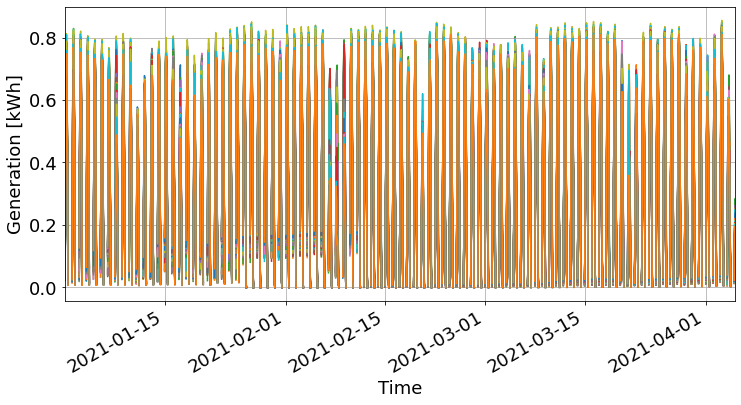

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font',size=18)
df = xds['capacity_factor'].to_dataframe().unstack(level=-1)
df.plot(legend=False, figsize=(12,6))
# Limit x-axis to inspect
plt.xlim(['2021-01-01T00:30:00.000000000', '2021-04-05T00:30:00.000000000'])
plt.ylabel("Generation [kWh]")
plt.xlabel("Time")
plt.grid()
plt.show()

In [6]:
listdir('../Availability curves')

['.DS_Store']

In [7]:
df_save=xds['capacity_factor'].to_dataframe().unstack(level=-1)
df_save.to_csv('../Availability curves/China_South_solar_PV_availability.csv')

In [23]:
## ONSHORE WIND 
# Load placement locations you want to get capacitiy curves for 

# Placment locations do not have to be put in as a pandas dataframe (a list of coordinates would also be okay), but 
# it is also the most flexible. Therefore, this manner is suggested
placements = pd.read_csv('./../../Placements/3. Placements/China_Central_onshore_wind_placements.csv', sep="\t")

placements


,capacity,hub_height,rotor_diam,lon,lat
0,4000.0,140.0,130.0,101.550,26.642
1,4000.0,140.0,130.0,101.788,26.417
2,4000.0,140.0,130.0,102.025,26.192
3,4000.0,140.0,130.0,102.025,26.417
4,4000.0,140.0,130.0,102.025,26.642
...,...,...,...,...,...
1285,4000.0,140.0,130.0,118.198,28.216
1286,4000.0,140.0,130.0,118.198,28.441
1287,4000.0,140.0,130.0,118.198,28.665
1288,4000.0,140.0,130.0,118.198,28.890


In [24]:
# Update file path to Global Wind Atlas file on your hard drive
# Note: currently global Global Wind Atlas data can not be loaded at once due to size

# capacity generation
gen_onshore = rk.wind.workflows.workflows.onshore_wind_merra_wagner_nea(
    placements=placements,
    merra_path='./../merra-21-NEA', # path to MERRA2 data on your hard drive
    gwa_50m_path='./../Global Wind Atlas/gwa3_250_wind-speed_50m_clipped.tif', # Path to Global Wind Atlas 3 (at 50m, to match MERRA) on your hard drive 
    globCover2009_path='./../GLOBCOVER_L4_200901_200912_V2_3.tif', # Path to Globcover2010 land cover (or anther land cover dataset) on your hard drive
)

Hello world 1
Hello world 5
[]
[]
globCover


In [10]:
# Recover as a dataframe
gen_onshore['capacity_factor'].to_dataframe().unstack(level=-1)

capacity_factor                                    \
location                       0             1         2         3      
time                                                                    
2021-01-01 00:30:00        0.991980  2.141131e-06  0.993262  0.093267   
2021-01-01 01:30:00        0.992832  7.791906e-08  0.993262  0.007425   
2021-01-01 02:30:00        0.993111  3.682901e-09  0.993262  0.000127   
2021-01-01 03:30:00        0.992423  5.326515e-07  0.993262  0.000861   
2021-01-01 04:30:00        0.932474  1.908004e-01  0.993137  0.856488   
...                             ...           ...       ...       ...   
2021-12-31 19:30:00        0.017281  2.385549e-01  0.123471  0.506353   
2021-12-31 20:30:00        0.036046  4.242164e-01  0.241310  0.795667   
2021-12-31 21:30:00        0.056560  6.925089e-01  0.319698  0.949337   
2021-12-31 22:30:00        0.056324  6.984339e-01  0.264429  0.933628   
2021-12-31 23:30:00        0.060084  4.658916e-01  0.221902  0.755021   

                                                                       \
location                 4         5         6         7         8      
time                                                                    
2021-01-01 00:30:00  0.863214  0.404388  0.925109  0.978462  0.992998   
2021-01-01 01:30:00  0.623219  0.574584  0.975906  0.990935  0.985265   
2021-01-01 02:30:00  0.323777  0.838301  0.992319  0.993174  0.912900   
2021-01-01 03:30:00  0.573227  0.877172  0.992647  0.993191  0.967710   
2021-01-01 04:30:00  0.992901  0.420540  0.887490  0.952173  0.993262   
...                       ...       ...       ...       ...       ...   
2021-12-31 19:30:00  0.013939  0.001373  0.038901  0.081210  0.027479   
2021-12-31 20:30:00  0.046784  0.007478  0.110670  0.208088  0.080247   
2021-12-31 21:30:00  0.123603  0.002523  0.148054  0.348144  0.176592   
2021-12-31 22:30:00  0.099460  0.000013  0.085059  0.296106  0.125347   
2021-12-31 23:30:00  0.040128  0.000008  0.042868  0.154541  0.052891   

                               ...                                          \
location                 9     ...      2876      2877      2878      2879   
time                           ...                                           
2021-01-01 00:30:00  0.786140  ...  0.993262  0.975046  0.984220  0.993262   
2021-01-01 01:30:00  0.907058  ...  0.993118  0.739207  0.861421  0.993169   
2021-01-01 02:30:00  0.982388  ...  0.978011  0.967824  0.830025  0.992357   
2021-01-01 03:30:00  0.987383  ...  0.993246  0.992891  0.978903  0.993259   
2021-01-01 04:30:00  0.866002  ...  0.993057  0.991715  0.993261  0.992870   
...                       ...  ...       ...       ...       ...       ...   
2021-12-31 19:30:00  0.004225  ...  0.993262  0.555543  0.991464  0.993262   
2021-12-31 20:30:00  0.008374  ...  0.993262  0.792809  0.988966  0.993262   
2021-12-31 21:30:00  0.006071  ...  0.993262  0.923017  0.971434  0.993259   
2021-12-31 22:30:00  0.008166  ...  0.993262  0.969711  0.944263  0.993225   
2021-12-31 23:30:00  0.024278  ...  0.993262  0.988715  0.959750  0.993235   

                                                                       \
location                 2880      2881      2882      2883      2884   
time                                                                    
2021-01-01 00:30:00  0.993257  0.993262  0.993253  0.993245  0.993258   
2021-01-01 01:30:00  0.993260  0.993192  0.987738  0.988905  0.991351   
2021-01-01 02:30:00  0.993142  0.988060  0.896196  0.969943  0.972157   
2021-01-01 03:30:00  0.993262  0.993247  0.991624  0.989249  0.992074   
2021-01-01 04:30:00  0.991874  0.993255  0.993262  0.993248  0.993261   
...                       ...       ...       ...       ...       ...   
2021-12-31 19:30:00  0.993257  0.993262  0.993260  0.993191  0.993250   
2021-12-31 20:30:00  0.993262  0.993262  0.993240  0.992811  0.993057   
2021-12-31 21:30:00  0.993262  0.993261  0.993133  0.983362  0.988290   
2021-

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font',size=18)
df = gen_onshore['capacity_factor'].to_dataframe().unstack(level=-1)
df.plot(legend=False, figsize=(12,6))
# Limit x-axis to inspect
#plt.xlim(['2021-01-01T00:30:00.000000000', '2021-01-05T00:30:00.000000000'])
plt.ylabel("Generation [kWh]")
plt.xlabel("Time")
plt.grid()
plt.show()

KeyboardInterrupt: 

In [25]:
#Save output file to availabilty curves folder
df_save=gen_onshore['capacity_factor'].to_dataframe().unstack(level=-1)
df_save.to_csv('../Availability curves/China_Central_onshore_wind_availability.csv')

In [88]:
listdir('./../')

['merra-21_raw_data_from_NASAGEODisc',
 'RESKit',
 '.DS_Store',
 'GLOBCOVER_L4_200901_200912_V2_3.tif',
 'merra-21-NEA',
 'nea_gpc_data_needs_v2_2022-06-28-China-LEI XIAOMENG-CEC.xlsx',
 'Availability curves',
 'merra-2008-2017',
 'merra-21-NEA.nc4',
 'Global Solar Atlas',
 '.ipynb_checkpoints',
 'Long run average from Merra2.ipynb',
 'Global Wind Atlas']

In [34]:
# OFF-SHORE WIND KOREA
# Placment locations do not have to be put in as a pandas dataframe (a list of coordinates would also be okay), but 
#  it is also the most flexible. Therefore, this manner is suggested
placements = pd.read_csv('./../../Placements/3. Placements/China_North_offshore_wind_placements.csv', sep="\t")

placements.head()

,capacity,hub_height,rotor_diam,lon,lat
0,4000.0,140.0,130.0,117.628,38.374
1,4000.0,140.0,130.0,117.628,38.599
2,4000.0,140.0,130.0,117.628,38.824
3,4000.0,140.0,130.0,117.628,39.049
4,4000.0,140.0,130.0,117.628,39.274


In [35]:
gen_offwind = rk.wind.offshore_wind_merra_caglayan2019(
    placements = placements,
    merra_path='./../merra-21-NEA', # path to MERRA2 data on your hard drive,
)

In [36]:
# Recover as a dataframe
gen_offwind['capacity_factor'].to_dataframe().unstack(level=-1)

capacity_factor                                          \
location                        0         1         2         3         4     
time                                                                          
2021-01-01 00:30:00        0.000691  0.003246  0.051141  0.184868  0.197283   
2021-01-01 01:30:00        0.000318  0.001115  0.017120  0.067219  0.073365   
2021-01-01 02:30:00        0.000153  0.000476  0.005769  0.025782  0.047530   
2021-01-01 03:30:00        0.000019  0.000042  0.000660  0.003972  0.012937   
2021-01-01 04:30:00        0.000094  0.000040  0.000131  0.000362  0.000928   
...                             ...       ...       ...       ...       ...   
2021-12-31 19:30:00        0.207313  0.194857  0.186506  0.145249  0.041845   
2021-12-31 20:30:00        0.189082  0.176544  0.167510  0.127135  0.032301   
2021-12-31 21:30:00        0.167649  0.151239  0.134697  0.094197  0.019612   
2021-12-31 22:30:00        0.146857  0.132563  0.111162  0.072516  0.013355   
2021-12-31 23:30:00        0.117722  0.111525  0.098804  0.068684  0.014413   

                                                                       ...  \
location                  5         6         7         8         9    ...   
time                                                                   ...   
2021-01-01 00:30:00  0.001972  0.000156  0.000587  0.031795  0.167683  ...   
2021-01-01 01:30:00  0.001192  0.000236  0.000678  0.015375  0.069502  ...   
2021-01-01 02:30:00  0.000657  0.000326  0.000819  0.007743  0.030819  ...   
2021-01-01 03:30:00  0.000236  0.000100  0.000188  0.001388  0.006112  ...   
2021-01-01 04:30:00  0.000662  0.000115  0.000059  0.000195  0.000561  ...   
...                       ...       ...       ...       ...       ...  ...   
2021-12-31 19:30:00  0.234554  0.228984  0.222814  0.215898  0.174517  ...   
2021-12-31 20:30:00  0.217958  0.212951  0.206892  0.199541  0.158821  ...   
2021-12-31 21:30:00  0.199639  0.190983  0.178812  0.162629  0.120800  ...   
2021-12-31 22:30:00  0.180054  0.179794  0.166743  0.139634  0.095250  ...   
2021-12-31 23:30:00  0.155743  0.162789  0.154316  0.128178  0.087685  ...   

                                                                       \
location                  309       310       311       312       313   
time                                                                    
2021-01-01 00:30:00  0.252224  0.325713  0.415741  0.528443  0.625509   
2021-01-01 01:30:00  0.209077  0.275351  0.360956  0.476248  0.578810   
2021-01-01 02:30:00  0.222637  0.292094  0.381543  0.501396  0.608550   
2021-01-01 03:30:00  0.270118  0.343415  0.431852  0.540903  0.639021   
2021-01-01 04:30:00  0.281061  0.346274  0.420856  0.506937  0.589703   
...                       ...       ...       ...       ...       ...   
2021-12-31 19:30:00  0.000007  0.000005  0.000006  0.000021  0.000061   
2021-12-31 20:30:00  0.000055  0.000104  0.000212  0.000503  0.001075   
2021-12-31 21:30:00  0.000624  0.001131  0.002028  0.003730  0.006503   
2021-12-31 22:30:00  0.002114  0.004364  0.008262  0.014503  0.023759   
2021-12-31 23:30:00  0.009611  0.017743  0.029380  0.043682  0.062530   

                                                                       
location                  314       315       316       317       318  
time                                                                   
2021-01-01 00:30:00  0.604034  0.582290  0.381963  0.478288  0.589900  
2021-01-01 01:30:00  0.551355  0.523751  0.330706  0.424398  0.540184  
2021-01-01 02:30:00  0.601981  0.595388  0.348225  0.446144  0.565332  
2021-01-01 03:30:00  0.663120  0.686606  0.402741  0.500261  0.612542  
2021-01-01 04:30:00  0.642180  0.692306  0.407092  0.493079  0.592621  
...                       ...       ...       ...       ...       ...  
2021-12-31 19:30:00  0.000188  0.000482  0.000011  0.000005  0.000006  
2021-12-31 20:30:00  0.002285  0.004450  0.000045  0.000054  0.000094  
2021-

In [37]:
print('Min, max: ', np.nanmin(gen_offwind['capacity_factor'].data),', ', np.nanmax(gen_offwind['capacity_factor'].data))

Min, max:  6.27212674250288e-09 ,  0.9728223407542772


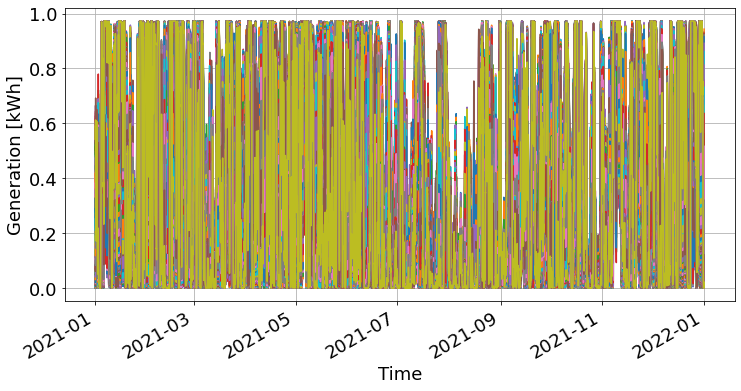

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font',size=18)
df = gen_offwind['capacity_factor'].to_dataframe().unstack(level=-1)
df.plot(legend=False, figsize=(12,6))
# Limit x-axis to inspect
#plt.xlim(['2021-01-01T00:30:00.000000000', '2021-02-02T00:30:00.000000000'])
plt.ylabel("Generation [kWh]")
plt.xlabel("Time")
plt.grid()
plt.show()

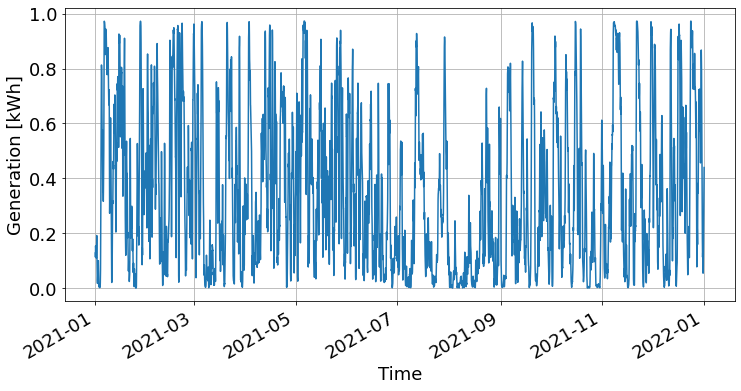

In [39]:
# Look at average
plt.rc('font',size=18)
df = gen_offwind['capacity_factor'].to_dataframe().unstack(level=-1).mean(axis=1)
df.plot(legend=False, figsize=(12,6))
# Limit x-axis to inspect
#plt.xlim(['2021-01-01T00:30:00.000000000', '2021-01-05T00:30:00.000000000'])
plt.ylabel("Generation [kWh]")
plt.xlabel("Time")
plt.grid()
plt.show()

In [40]:
listdir('./../')

['RESKit',
 '.DS_Store',
 'GLOBCOVER_L4_200901_200912_V2_3.tif',
 'merra-21-NEA',
 'Availability curves',
 'merra-21-NEA.nc4',
 'Global Solar Atlas',
 '.ipynb_checkpoints',
 'Long run average from Merra2.ipynb',
 'Global Wind Atlas']

In [41]:
df_save=gen_offwind['capacity_factor'].to_dataframe().unstack(level=-1)
df_save.to_csv('./../Availability curves/China_North_offshore_wind_placements.csv')